In [2]:
from sliderule import icesat2, ipysliderule, io, sliderule
import geopandas
from IPython import display
import warnings
import pandas as pd
import time
import json

import numpy as np
import matplotlib.lines
import matplotlib.pyplot as plt

# turn off warnings for demo
warnings.filterwarnings('ignore')

In [3]:
help(ipysliderule.leaflet.GeoData)

Help on function GeoData in module sliderule.ipysliderule:

GeoData(self, gdf, **kwargs)
    Creates scatter plots of GeoDataFrames on leaflet maps
    
    Parameters
    ----------
    column_name : str, GeoDataFrame column to plot
    cmap : str, matplotlib colormap
    vmin : float, minimum value for normalization
    vmax : float, maximum value for normalization
    norm : obj, matplotlib color normalization object
    radius : float, radius of scatter plot markers
    fillOpacity : float, opacity of scatter plot markers
    weight : float, weight of scatter plot markers
    stride : int, number between successive array elements
    max_plot_points : int, total number of plot markers to render
    tooltip : bool, show hover tooltips
    fields : list, GeoDataFrame fields to show in hover tooltips
    colorbar : bool, show colorbar for rendered variable
    position : str, position of colorbar on leaflet map



In [4]:
def on_run_clicked(b):
    print(b)
    global atl06_rsps, points_dropdown
    with run_output:
        #print(f'SlideRule processing request... initiated\r', end="")
        #perf_start = time.perf_counter()
        #atl06_rsps = runSlideRule()
        #perf_duration = time.perf_counter() - perf_start
        #print(f'SlideRule processing request... completed in {perf_duration:.3f} seconds; returned {atl06_rsps.shape[0]} elevations                                   ')
        if atl06_rsps.shape[0] > 0:
            max_plot_points = 10000
            if points_dropdown.value == "100K":
                max_plot_points = 100000
            elif points_dropdown.value == "all":
                max_plot_points = 1000000000
            if max_plot_points > atl06_rsps.shape[0]:
                max_plot_points = atl06_rsps.shape[0]
            print(f'Plotting {max_plot_points} of {atl06_rsps.shape[0]} elevations. This may take 10-60+ seconds for larger point datasets.')
            m.GeoData(atl06_rsps, column_name=SRwidgets.variable.value, cmap=SRwidgets.colormap, max_plot_points=max_plot_points)


In [5]:
icesat2.init('slideruleearth.io', verbose=True)

<module 'sliderule.version' from '/usr/local/lib/python3.10/site-packages/sliderule/version.py'>


In [6]:
testRegion = [{'lon': 1.073914, 'lat': -71.39084},
  {'lon': 1.231842, 'lat': -71.39084},
  {'lon': 1.231842, 'lat': -71.357506},
  {'lon': 1.073914, 'lat': -71.357506},
  {'lon': 1.073914, 'lat': -71.39084}]
rossA_2020_10_26 = [{'lon': -165.0222, 'lat': -78.7811},
  {'lon': -168.6181, 'lat': -78.6802},
  {'lon': -172.5103, 'lat': -78.7094},
  {'lon': -172.4843, 'lat': -78.7848},
  {'lon': -165.0222, 'lat': -78.7811}]

regions=testRegion
srt=icesat2.SRT_LAND,
segLen=40
res=25
cnf=icesat2.CNF_SURFACE_HIGH
maxIter=1
atSpread=20.0
PECount=10
H_min_win=3.0
sigma_r_max=5.0

parms = {
    "poly": testRegion,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

In [7]:
gdf = icesat2.atl06p(parms)
with open('testRegion.txt', 'w') as f:
    f.write(gdf.to_string())

INFO:sliderule.earthdata:Identified 140 resources to process
INFO:sliderule.sliderule:request <AppServer.30619> processing initialized on ATL03_20181210001557_11050110_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.30615> processing initialized on ATL03_20190107225204_01600210_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.30588> processing initialized on ATL03_20181214125520_11740112_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.26036> processing initialized on ATL03_20190111224341_02210210_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.10162> processing initialized on ATL03_20190209211955_06630210_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.30819> processing initialized on ATL03_20190112113124_02290212_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.30820> processing initialized on ATL03_20190408183157_01600310_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.30616> processing initialized on ATL03_201903110

In [11]:
projection = 'South'
max_plot_points = gdf.shape[0]
m = ipysliderule.leaflet(projection)
m.GeoData(gdf, column_name='h_mean', cmap='viridis', max_plot_points=max_plot_points)

In [12]:
display.display(m.map)

Map(center=[-90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [10]:
# incomplete shell of a subsetting function
rgt_list = np.unique(gdf.)
for rgt in rgt_list:
    df_subset = gdf[gdf.rgt == rgt]

SyntaxError: invalid syntax (393527806.py, line 2)

In [ ]:
unique_indices = np.unique(gdf.loc[:, ['rgt', 'gt', 'cycle']])
uniques = gdf.iloc[unique_indices].loc[:, ['rgt', 'gt', 'cycle']]

In [10]:
with open('uniques.txt', 'w') as f:
    f.write(gdf.loc[:, ['rgt', 'gt', 'cycle']].to_string())

In [11]:
print(np.unique(gdf.loc[:, 'rgt'], return_counts=True))
print(np.unique(gdf.loc[:, 'gt'], return_counts=True))
print(np.unique(gdf.loc[:, 'cycle'], return_counts=True))

(array([221, 732], dtype=uint16), array([7076, 3808]))
(array([20, 30, 40, 50, 60], dtype=uint8), array([ 187, 3526, 3520, 1782, 1869]))
(array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17],
      dtype=uint16), array([ 304,  189, 1124,  746,  602, 1124, 1124,  689,  201,  865, 1124,
        936,  348,  759,  749]))


In [12]:
cycles = np.unique(gdf.loc[:, 'cycle'])
rgts = np.unique(gdf.loc[:, 'rgt'])
gts = np.unique(gdf.loc[:, 'gt'])

In [13]:
# Works to subset selected gt (60) and newest cycle (17)
cycleChoice = cycles.max()
gtChoice = 60
rgtChoice = 221
#syntax for gt is weird because it is not an attribute of GDFs
df_subset = gdf[(gdf.cycle == cycleChoice)*gdf.loc[:, 'gt']==gtChoice]
df_subset.loc[:, ['rgt', 'gt', 'cycle']]

,rgt,gt,cycle
time,,,
2022-10-05 05:46:57.142542080,221,60,17
2022-10-05 05:46:57.145381888,221,60,17
2022-10-05 05:46:57.148216064,221,60,17
2022-10-05 05:46:57.151043328,221,60,17
2022-10-05 05:46:57.153870080,221,60,17
...,...,...,...
2022-10-05 05:46:57.655170560,221,60,17
2022-10-05 05:46:57.657985024,221,60,17
2022-10-05 05:46:57.660803328,221,60,17


In [14]:
# globals for atl03 processing
atl03_rsps = None
atl03_parms = None
show_code03_button = widgets.Button(description="Show Code")
show_code03_output = widgets.Output()
elev_dropdown = None
pc_button = widgets.Button(description="Plot Photon Cloud")
pc_output = widgets.Output()

# track lookup tables
gt2str = {icesat2.GT1L: 'gt1l', icesat2.GT1R: 'gt1r', icesat2.GT2L: 'gt2l', icesat2.GT2R: 'gt2r', icesat2.GT3L: 'gt3l', icesat2.GT3R: 'gt3r'}
str2gt = {'gt1l': icesat2.GT1L, 'gt1r': icesat2.GT1R, 'gt2l': icesat2.GT2L, 'gt2r': icesat2.GT2R, 'gt3l': icesat2.GT3L, 'gt3r': icesat2.GT3R}
gtlookup = {icesat2.GT1L: 1, icesat2.GT1R: 1, icesat2.GT2L: 2, icesat2.GT2R: 2, icesat2.GT3L: 3, icesat2.GT3R: 3}
pairlookup = {icesat2.GT1L: 0, icesat2.GT1R: 1, icesat2.GT2L: 0, icesat2.GT2R: 1, icesat2.GT3L: 0, icesat2.GT3R: 1}

NameError: name 'widgets' is not defined

In [15]:
atl03_parms

In [16]:
# globals for atl03 processing
atl03_rsps = None
atl03_parms = {
        # processing parameters
        "srt": icesat2.SRT_LAND,
        "len": 40.0,
        "res": 20.0,

        # classification and checks
        "pass_invalid": True, # still return photon segments that fail checks
        "cnf": -2, # all photons
        "yapc": {"score": 0}, # all photons
        "ats": 20.0,
        "cnt": 10,
        
        # region of interest
        "poly": testRegion,
        
        # track selection
        "rgt": rgtChoice,
        "cycle": cycleChoice,
        "track": 60
    }

# track lookup tables
gt2str = {icesat2.GT1L: 'gt1l', icesat2.GT1R: 'gt1r', icesat2.GT2L: 'gt2l', icesat2.GT2R: 'gt2r', icesat2.GT3L: 'gt3l', icesat2.GT3R: 'gt3r'}
str2gt = {'gt1l': icesat2.GT1L, 'gt1r': icesat2.GT1R, 'gt2l': icesat2.GT2L, 'gt2r': icesat2.GT2R, 'gt3l': icesat2.GT3L, 'gt3r': icesat2.GT3R}
gtlookup = {icesat2.GT1L: 1, icesat2.GT1R: 1, icesat2.GT2L: 2, icesat2.GT2R: 2, icesat2.GT3L: 3, icesat2.GT3R: 3}
pairlookup = {icesat2.GT1L: 0, icesat2.GT1R: 1, icesat2.GT2L: 0, icesat2.GT2R: 1, icesat2.GT3L: 0, icesat2.GT3R: 1}

In [17]:
parms = {
    # processing parameters
    "srt": icesat2.SRT_LAND,
    "len": 20,
    # classification and checks
    # still return photon segments that fail checks
    "pass_invalid": True, 
    # all photons
    "cnf": -2, 
    # all land classification flags
    "atl08_class": ["atl08_noise", "atl08_ground", "atl08_canopy", "atl08_top_of_canopy", "atl08_unclassified"],
    # all photons
    "yapc": dict(knn=0, win_h=6, win_x=11, min_ph=4, score=0), 
    "poly": testRegion
}

release = '005'



In [18]:
# Run ATL03 Subsetter
print(f'SlideRule processing request... initiated\r', end="")
perf_start = time.perf_counter()
atl03_rsps = icesat2.atl03sp(parms)
perf_duration = time.perf_counter() - perf_start
print(f'SlideRule processing request... completed in {perf_duration:.3f} seconds; returned {atl03_rsps.shape[0]} records                                   ')


INFO:sliderule.earthdata:Identified 140 resources to process
INFO:sliderule.sliderule:request <AppServer.15434> processing initialized on ATL03_20181111142754_06710112_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.15335> processing initialized on ATL03_20190111224341_02210210_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.15296> processing initialized on ATL03_20181214125520_11740112_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.15319> processing initialized on ATL03_20181115141931_07320112_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.13658> processing initialized on ATL03_20181210001557_11050110_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.15349> processing initialized on ATL03_20190107225204_01600210_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.15261> processing initialized on ATL03_20190516053856_07320312_005_01.h5 ...
INFO:sliderule.sliderule:request <AppServer.15569> processing initialized on ATL03_201811110

SlideRule processing request... completed in 93.097 seconds; returned 2505730 records                                   


In [24]:
# Works to subset selected gt (60) and newest cycle (17)
cycleChoice = cycles.max()
trackChoice = 2
rgtChoice = 221
# 1 is strong here
pairChoice = 1
#syntax for gt is weird because it is not an attribute of GDFs
df_subset = atl03_rsps[(atl03_rsps.cycle == cycleChoice)*(atl03_rsps.loc[:, 'track']==trackChoice)
    *(atl03_rsps.loc[:, 'pair']==pairChoice)]
#np.unique(df_subset.loc[:, ['rgt', 'cycle', 'track', 'pair']])
#df_subset

In [25]:
df_subset

,rgt,segment_dist,cycle,solar_elevation,background_rate,segment_id,track,sc_orient,yapc_score,atl08_class,snowcover,relief,landcover,quality_ph,distance,height,atl03_cnf,pair,geometry,spot
time,,,,,,,,,,,,,,,,,,,,
2022-10-05 05:46:57.095185920,221,2.803205e+07,17,4.918245,958404.107505,1400208,2,1,173,1,255,0.0,255,0,-9.778630,484.629669,4,1,POINT (1.22410 -71.35757),3
2022-10-05 05:46:57.095185920,221,2.803205e+07,17,4.918245,958404.107505,1400208,2,1,177,1,255,0.0,255,0,-9.777690,484.963928,4,1,POINT (1.22410 -71.35757),3
2022-10-05 05:46:57.095286016,221,2.803205e+07,17,4.918245,958404.107505,1400208,2,1,178,0,255,0.0,255,0,-9.069465,483.938904,4,1,POINT (1.22409 -71.35757),3
2022-10-05 05:46:57.095286016,221,2.803205e+07,17,4.918245,958404.107505,1400208,2,1,12,4,255,0.0,255,0,-9.027018,499.167908,0,1,POINT (1.22409 -71.35758),3
2022-10-05 05:46:57.095286016,221,2.803205e+07,17,4.918245,958404.107505,1400208,2,1,201,1,255,0.0,255,0,-9.067008,484.812622,4,1,POINT (1.22409 -71.35757),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05 05:46:57.624686080,221,2.803577e+07,17,4.915126,896438.015831,1400395,2,1,151,1,255,0.0,255,0,9.506271,511.982147,4,1,POINT (1.21047 -71.39082),3
2022-10-05 05:46:57.624686080,221,2.803577e+07,17,4.915126,896438.015831,1400395,2,1,150,1,255,0.0,255,0,9.505655,511.761841,4,1,POINT (1.21047 -71.39082),3
2022-10-05 05:46:57.624686080,221,2.803577e+07,17,4.915126,896438.015831,1400395,2,1,27,4,255,0.0,255,0,9.494619,507.766663,2,1,POINT (1.21047 -71.39082),3


In [367]:
df_subset.geometry[:].y

time
2022-10-05 05:46:57.095185920   -71.357569
2022-10-05 05:46:57.095185920   -71.357569
2022-10-05 05:46:57.095286016   -71.357575
2022-10-05 05:46:57.095286016   -71.357575
2022-10-05 05:46:57.095286016   -71.357575
                                   ...    
2022-10-05 05:46:57.624686080   -71.390822
2022-10-05 05:46:57.624686080   -71.390822
2022-10-05 05:46:57.624686080   -71.390822
2022-10-05 05:46:57.624686080   -71.390822
2022-10-05 05:46:57.624686080   -71.390822
Length: 43187, dtype: float64

In [ ]:
##c=atl03_rsps.yapc_score,

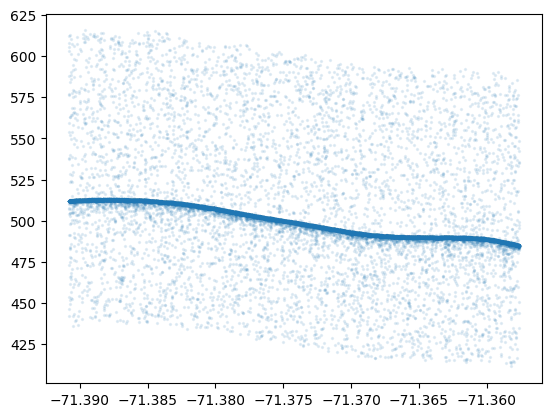

In [26]:
plt.scatter(df_subset.geometry.y, df_subset.height, s=2, alpha=0.1, label='ATL03')

In [27]:
icesat2.plot(atl06_rsps, ax=ax, kind='scatter',
        atl03=atl03_rsps, cmap='viridis',
        classification='yapc',
        #segments=(elev_dropdown.value == 'enabled'),
        legend=True, legend_frameon=True)

AttributeError: module 'sliderule.icesat2' has no attribute 'plot'

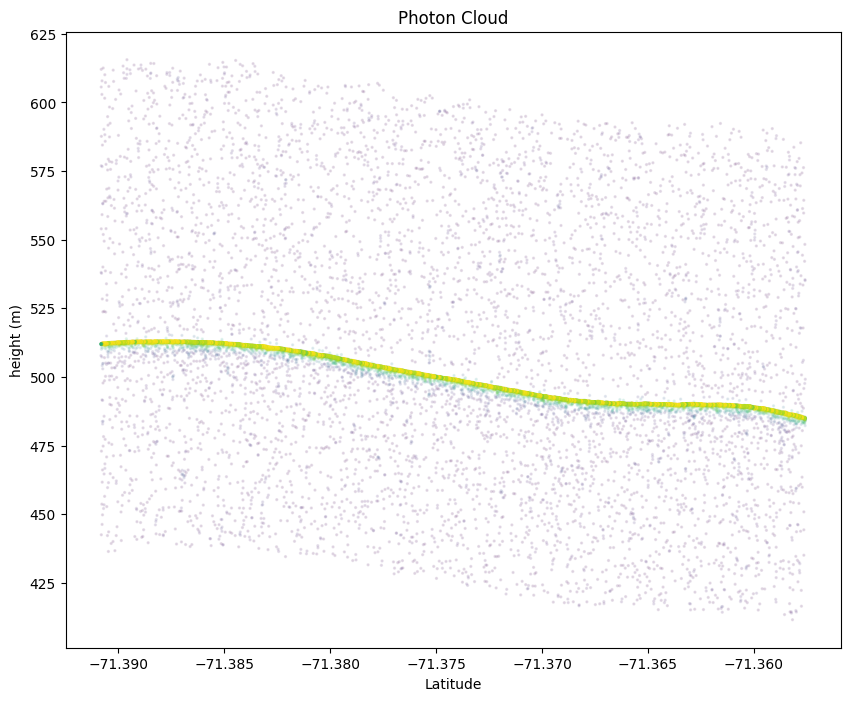

In [28]:
# Create Plots
atl06_rsps = gdf
atl03_sub = df_subset
if atl03_sub.shape[0] > 0 and atl06_rsps.shape[0] > 0:
    fig, ax = plt.subplots(num=None, figsize=(10, 8))
    fig.set_facecolor('white')
    fig.canvas.header_visible = False
    ax.set_title("Photon Cloud")
    ax.set_xlabel('Latitude')
    ax.set_ylabel('height (m)')
    ax.scatter(atl03_sub.geometry.y, atl03_sub.height, c=atl03_sub.yapc_score, s=2, 
        cmap='viridis', alpha=0.1, label='ATL03')
    # draw and show plot
    plt.show()